In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
receiving_positions={1:'wr',
                   2:'te'}

In [3]:
df = pl.read_csv('nfl-big-data-bowl-2025/players.csv')
df = df.filter(pl.col('position').is_in(['WR','TE']))
df = df.with_columns([pl.col('nflId').cast(str)])
df

nflId,height,weight,birthDate,collegeName,position,displayName
str,str,i64,str,str,str,str
"""30842""","""6-6""",267,"""1984-05-19""","""UCLA""","""TE""","""Marcedes Lewis"""
"""33130""","""5-10""",175,"""1986-12-01""","""California""","""WR""","""DeSean Jackson"""
"""33234""","""6-0""",205,"""1985-09-09""","""UCLA""","""WR""","""Matt Slater"""
"""37077""","""6-4""",210,"""1988-07-31""","""Georgia""","""WR""","""A.J. Green"""
"""37079""","""6-3""",220,"""1989-02-08""","""Alabama""","""WR""","""Julio Jones"""
…,…,…,…,…,…,…
"""55133""","""6-0""",180,"""NA""","""Weber State""","""WR""","""Rashid Shaheed"""
"""55157""","""6-4""",245,"""NA""","""Indiana""","""TE""","""Peyton Hendershot"""
"""55158""","""6-2""",205,"""NA""","""Western Illinois""","""WR""","""Dennis Houston"""


In [4]:
plays = pl.read_csv('nfl-big-data-bowl-2025/plays.csv',infer_schema_length=100000)

In [5]:
games = pl.read_csv('nfl-big-data-bowl-2025/games.csv',infer_schema_length=10000)
games

gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
i64,i64,i64,str,str,str,str,i64,i64
2022090800,2022,1,"""9/8/2022""","""20:20:00""","""LA""","""BUF""",10,31
2022091100,2022,1,"""9/11/2022""","""13:00:00""","""ATL""","""NO""",26,27
2022091101,2022,1,"""9/11/2022""","""13:00:00""","""CAR""","""CLE""",24,26
2022091102,2022,1,"""9/11/2022""","""13:00:00""","""CHI""","""SF""",19,10
2022091103,2022,1,"""9/11/2022""","""13:00:00""","""CIN""","""PIT""",20,23
…,…,…,…,…,…,…,…,…
2022110607,2022,9,"""11/6/2022""","""13:00:00""","""WAS""","""MIN""",17,20
2022110608,2022,9,"""11/6/2022""","""16:05:00""","""ARI""","""SEA""",21,31
2022110609,2022,9,"""11/6/2022""","""16:25:00""","""TB""","""LA""",16,13


In [6]:
plays = plays.join(games,on='gameId')
plays = plays.with_columns([
    (pl.col('gameId').cast(str) + '-'
     + pl.col('playId').cast(str)).alias('uniquePlayId')
])

In [7]:
plays = plays.filter(pl.col('isDropback') == False)
plays = plays.filter(pl.col('qbKneel') == 0)

plays = plays.with_columns([
    # Extract the minutes and seconds using slice
    pl.col('gameClock').str.slice(0, 2).cast(int).alias('minutes'),  # Extract first 2 characters for minutes
    pl.col('gameClock').str.slice(3, 5).cast(int).alias('seconds')   # Extract last 2 characters for seconds
])

# Now, calculate total seconds for 'gameClock'
plays = plays.with_columns([
    (pl.col('minutes') * 60 + pl.col('seconds')).alias('gameClock_seconds')
])

# Add the corresponding time based on the quarter
plays = plays.with_columns([
    pl.when(pl.col('quarter') == 1).then(45 * 60)  # 45 minutes for quarter 1
    .when(pl.col('quarter') == 2).then(30 * 60)  # 30 minutes for quarter 2
    .when(pl.col('quarter') == 3).then(15 * 60)  # 15 minutes for quarter 3
    .otherwise(0).alias('time_to_add')  # 0 for other quarters or default
])

# Calculate the 'timeRemaining' by adding 'gameClock_seconds' and 'time_to_add'
plays = plays.with_columns([
    (pl.col('gameClock_seconds') + pl.col('time_to_add')).alias('timeRemaining')
])

plays

gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,uniquePlayId,minutes,seconds,gameClock_seconds,time_to_add,timeRemaining
i64,i64,str,i64,i64,i64,str,str,str,i64,str,i64,i64,str,i64,f64,f64,f64,str,str,str,str,str,str,str,bool,str,str,str,str,str,str,str,str,str,i64,str,str,str,i64,i64,f64,f64,f64,bool,str,str,i64,str,str,i64,i64,str,str,str,str,i64,i64,str,i64,i64,i64,i32,i64
2022102700,2799,"""(2:16) (Shotgun) L.Jackson up …",3,2,8,"""BAL""","""TB""","""TB""",27,"""02:16""",10,10,"""N""",37,0.410371,0.589629,3.928413,"""PISTOL""","""3x1""","""8""","""""","""NA""","""NA""","""NA""",true,"""DESIGNED_RUN""","""2.02999997138977""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""INSIDE_LEFT""","""NA""",-1,-1,0.027141,-0.027141,-0.638912,false,"""MAN""","""READ OPTION""",0,"""Cover-1""","""Man""",2022,8,"""10/27/2022""","""20:15:00""","""TB""","""BAL""",22,27,"""2022102700-2799""",2,16,136,900,1036
2022100205,2314,"""(14:15) Ja.Williams up the mid…",3,2,6,"""DET""","""SEA""","""DET""",29,"""14:15""",15,31,"""N""",39,0.138289,0.861711,1.066931,"""SINGLEBACK""","""3x1""","""15""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""INSIDE_RIGHT""","""NA""",3,3,-0.02421,0.02421,-0.442517,false,"""MAN""","""NA""",0,"""Cover 6-Left""","""Zone""",2022,4,"""10/2/2022""","""13:00:00""","""DET""","""SEA""",45,48,"""2022100205-2314""",14,15,855,900,1755
2022110605,3861,"""(:29) (Shotgun) J.Wilkins up t…",4,1,10,"""IND""","""NE""","""IND""",40,"""00:29""",26,3,"""N""",50,0.997811,0.002189,0.991169,"""SHOTGUN""","""2x2""","""18""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""OUTSIDE_LEFT""","""NA""",5,5,0.002189,-0.002189,-0.991169,false,"""INSIDE ZONE""","""NA""",0,"""Cover-2""","""Zone""",2022,9,"""11/6/2022""","""13:00:00""","""NE""","""IND""",26,3,"""2022110605-3861""",0,29,29,0,29
2022102306,3240,"""(12:55) (Shotgun) A.Dillon lef…",4,2,10,"""GB""","""WAS""","""WAS""",46,"""12:55""",20,14,"""N""",64,0.630746,0.369254,2.416086,"""SHOTGUN""","""3x1""","""4""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""INSIDE_LEFT""","""NA""",0,0,0.053308,-0.053308,-0.962012,false,"""PULL LEAD""","""NA""",0,"""Cover-6 Right""","""Zone""",2022,7,"""10/23/2022""","""13:00:00""","""WAS""","""GB""",23,21,"""2022102306-3240""",12,55,775,0,775
2022100212,2463,"""(3:18) J.Herron reported in as…",3,1,1,"""LV""","""DEN""","""DEN""",1,"""03:18""",19,16,"""N""",11,0.824414,0.175586,6.442386,"""JUMBO""","""1x1""","""6""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""OUTSIDE_LEFT""","""NA""",-2,-2,-0.017039,0.017039,-0.822176,false,"""MAN""","""LEAD""",0,"""Goal Line""","""Other""",2022,4,"""10/2/2022""","""16:25:00""","""LV""","""DEN""",32,23,"""2022100212-2463""",3,18,198,900,1098
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…

In [8]:
tracking = pl.read_csv('nfl-big-data-bowl-2025/tracking_week*.csv',infer_schema_length=10000)
tracking = tracking.with_columns(
    (pl.col('gameId').cast(str) + '-'
     + pl.col('playId').cast(str)).alias('uniquePlayId'),
    (pl.col('gameId').cast(str) + '-'
     + pl.col('playId').cast(str) + '-'
     + pl.col('nflId').cast(str)).alias('uniquePlayerId'),
)


In [9]:
player_plays = pl.read_csv('nfl-big-data-bowl-2025/player_play.csv',infer_schema_length=10000)
player_plays = player_plays.with_columns(
    (pl.col('gameId').cast(str) + '-'
     + pl.col('playId').cast(str)).alias('uniquePlayId'),
    (pl.col('gameId').cast(str) + '-'
     + pl.col('playId').cast(str) + '-'
     + pl.col('nflId').cast(str)).alias('uniquePlayerId'),
    pl.col('nflId').cast(str)
)

In [10]:
player_plays = player_plays.filter(pl.col('nflId').is_in(df['nflId']))

In [11]:
player_plays.select('inMotionAtBallSnap').unique().to_series().to_list()

['TRUE', 'NA', 'FALSE']

In [12]:
player_plays = player_plays.filter(pl.col('inMotionAtBallSnap') == 'TRUE')

In [13]:
player_plays = player_plays.with_columns([
    pl.when(
        (pl.col('blockedPlayerNFLId1') == "NA") & 
        (pl.col('blockedPlayerNFLId2') == "NA") & 
        (pl.col('blockedPlayerNFLId3') == "NA")
    ).then(0).otherwise(1).alias('Blocking')
])
player_plays

gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,fumbles,fumbleLost,fumbleOutOfBounds,assistedTackle,forcedFumbleAsDefense,halfSackYardsAsDefense,passDefensed,quarterbackHit,sackYardsAsDefense,safetyAsDefense,soloTackle,tackleAssist,tackleForALoss,tackleForALossYardage,hadInterception,interceptionYards,fumbleRecoveries,fumbleRecoveryYards,penaltyYards,penaltyNames,wasInitialPassRusher,causedPressure,timeToPressureAsPassRusher,getOffTimeAsPassRusher,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,uniquePlayId,uniquePlayerId,Blocking
i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,bool,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i32
2022090800,212,"""47879""","""BUF""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""1""","""IN""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""2022090800-212""","""2022090800-212-47879""",0
2022090800,236,"""52536""","""BUF""",0,0,0,0,0,1,26,1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""1""","""CORNER""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""2022090800-236""","""2022090800-236-52536""",0
2022090800,299,"""44881""","""LA""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""2022090800-299""","""2022090800-299-44881""",0
2022090800,343,"""44881""","""LA""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""2022090800-343""","""2022090800-343-44881""",0
2022090800,393,"""44881""","""LA""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""2022090800-393""","""2022090800-393-44881""",0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022110700,1577,"""52500""","""BAL""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""NA""","""1""","""CROSS""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""2022110700-1577""","""2022110700-1577-52500""",0
2022110700,2182,"""33130""","""BAL""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""1""","""GO""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""2022110700-2182""","""2022110700-2182-33130""",0
2022110700,2210,"""54604""","""BAL""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""2022110700-2210""","""2022110700-2210-54604""",0


In [14]:
block_player_plays = player_plays.filter(pl.col('Blocking') == 1)
block_player_plays

gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,fumbles,fumbleLost,fumbleOutOfBounds,assistedTackle,forcedFumbleAsDefense,halfSackYardsAsDefense,passDefensed,quarterbackHit,sackYardsAsDefense,safetyAsDefense,soloTackle,tackleAssist,tackleForALoss,tackleForALossYardage,hadInterception,interceptionYards,fumbleRecoveries,fumbleRecoveryYards,penaltyYards,penaltyNames,wasInitialPassRusher,causedPressure,timeToPressureAsPassRusher,getOffTimeAsPassRusher,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,uniquePlayId,uniquePlayerId,Blocking
i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,bool,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i32
2022091101,1438,"""52523""","""CLE""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""1""","""FLAT""","""46205""","""NA""","""NA""","""0""","""NA""","""NA""","""NA""","""NA""","""2022091101-1438""","""2022091101-1438-52523""",1
2022091101,3789,"""46170""","""CAR""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""NA""","""NA""","""44813""","""NA""","""NA""","""0""","""NA""","""NA""","""NA""","""NA""","""2022091101-3789""","""2022091101-3789-46170""",1
2022091103,1249,"""53484""","""PIT""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""NA""","""NA""","""52623""","""NA""","""NA""","""0""","""NA""","""NA""","""NA""","""NA""","""2022091103-1249""","""2022091103-1249-53484""",1
2022091106,3298,"""46111""","""MIA""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""NA""","""NA""","""46212""","""NA""","""NA""","""0""","""NA""","""NA""","""NA""","""NA""","""2022091106-3298""","""2022091106-3298-46111""",1
2022091106,3475,"""46671""","""MIA""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""1""","""CORNER""","""44837""","""NA""","""NA""","""0""","""NA""","""NA""","""NA""","""NA""","""2022091106-3475""","""2022091106-3475-46671""",1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022110607,325,"""41349""","""WAS""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""NA""","""NA""","""42431""","""NA""","""NA""","""0""","""NA""","""NA""","""NA""","""NA""","""2022110607-325""","""2022110607-325-41349""",1
2022110607,829,"""53553""","""WAS""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""FALSE""","""TRUE""","""NA""","""NA""","""53519""","""NA""","""NA""","""0""","""NA""","""NA""","""NA""","""NA""","""2022110607-829""","""2022110607-829-53553""",1
2022110609,339,"""54571""","""TB""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""NA""","""NA""",false,"""NA""","""NA""","""TRUE""","""TRUE""","""NA""","""NA""","""NA""","""52492""","""NA""","""NA""","""0""","""NA""","""NA""","""NA""","""NA""","""2022110609-339""","""2022110609-339-54571""",1


In [15]:
player_plays.filter(pl.col('Blocking') == 0).height

3659

In [16]:
player_plays.filter(pl.col('Blocking') == 1).height

67

In [17]:
tracking = tracking.filter(pl.col('uniquePlayerId').is_in(player_plays['uniquePlayerId']))

In [18]:
tracking=tracking.with_columns([
    pl.when(pl.col('playDirection')=='right').then(53.3-pl.col('y')).otherwise(pl.col('y')).alias('adjustedX'),
    pl.when(pl.col('playDirection')=='right').then(pl.col('x')).otherwise(120-pl.col('x')).alias('adjustedY')])

In [19]:
tracking = tracking.with_columns([
    pl.when(pl.col('event') == 'ball_snap').then(pl.col('frameId')).otherwise(None).alias('startingFrameId')
])
tracking = tracking.with_columns([
    pl.col('startingFrameId').max().over('uniquePlayId').alias('startingFrameId')
])
tracking = tracking.with_columns([
    (pl.col('frameId') - pl.col('startingFrameId')).alias('framesSinceSnap')
])

In [20]:
tracking = tracking.filter((pl.col('framesSinceSnap') >= -50) & (pl.col('framesSinceSnap') <= 35))

In [21]:
tracking = tracking.join(
    plays.select(['uniquePlayId', 'yardlineNumber']),
    on='uniquePlayId',
    how='left'
)
tracking = tracking.with_columns([
    pl.col('yardlineNumber').alias('los')
]).drop('yardlineNumber')

In [22]:
tracking = tracking.drop_nulls()

In [23]:
tracking = tracking.with_columns([
    pl.when(pl.col('framesSinceSnap') == -40).then(pl.col('adjustedX')).otherwise(-1000).alias('startingX'),
    pl.when(pl.col('framesSinceSnap') == -40).then(pl.col('adjustedY')).otherwise(-1000).alias('startingY')
])
tracking = tracking.with_columns([
    pl.col('startingX').max().over(pl.col('uniquePlayerId')),
    pl.col('startingY').max().over(pl.col('uniquePlayerId'))
])
tracking = tracking.with_columns([
    (pl.col('adjustedX') - pl.col('startingX')).alias('relativeX'),
    (pl.col('adjustedY') - pl.col('startingY')).alias('relativeY')
])

In [24]:
tracking = tracking.filter(pl.col('startingX') > -1000)

In [25]:
tracking = tracking.with_columns([
    (pl.col('los') + 10 - pl.col('adjustedY')).alias('fromLine')
])

In [26]:
tracking = tracking.with_columns([
    pl.when(pl.col('framesSinceSnap') == 12).then(pl.col('adjustedX')).otherwise(-1000).alias('endX'),
    pl.when(pl.col('framesSinceSnap') == 12).then(pl.col('adjustedY')).otherwise(-1000).alias('endY')
])
tracking = tracking.with_columns([
    pl.col('endX').max().over(pl.col('uniquePlayerId')),
    pl.col('endY').max().over(pl.col('uniquePlayerId'))
])
tracking = tracking.with_columns([
    (pl.col('startingX') - pl.col('endX')).abs().alias('distanceX')
])
tracking = tracking.with_columns([
    ((pl.col('startingX') - 26.65) * (pl.col('endX') - 26.65) < 0).cast(int).alias('crossedMiddle')
])
tracking = tracking.with_columns([
    ((pl.col('startingY') - pl.col('endY')) > 4).cast(int).alias('orbit')
])
tracking = tracking.with_columns([
    ((pl.col('distanceX') > 12.5).cast(int).alias('jet'))
])
tracking

gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,uniquePlayId,uniquePlayerId,adjustedX,adjustedY,startingFrameId,framesSinceSnap,los,startingX,startingY,relativeX,relativeY,fromLine,endX,endY,distanceX,crossedMiddle,orbit,jet
i64,i64,str,str,i64,str,str,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64
2022091200,64,"""47803""","""Noah Fant""",64,"""BEFORE_SNAP""","""2022-09-13 00:16:09.8""","""87""","""SEA""","""right""",37.58,28.51,0.07,0.2,0.0,"""71.84""","""189.08""","""NA""","""2022091200-64""","""2022091200-64-47803""",24.79,37.58,114,-50,30,24.73,37.54,0.06,0.04,2.42,35.97,37.76,11.24,1,0,0
2022091200,64,"""47803""","""Noah Fant""",65,"""BEFORE_SNAP""","""2022-09-13 00:16:09.9""","""87""","""SEA""","""right""",37.58,28.5,0.08,0.17,0.01,"""73.53""","""216.67""","""man_in_motion""","""2022091200-64""","""2022091200-64-47803""",24.8,37.58,114,-49,30,24.73,37.54,0.07,0.04,2.42,35.97,37.76,11.24,1,0,0
2022091200,64,"""47803""","""Noah Fant""",66,"""BEFORE_SNAP""","""2022-09-13 00:16:10""","""87""","""SEA""","""right""",37.57,28.49,0.09,0.14,0.01,"""75.22""","""229.41""","""NA""","""2022091200-64""","""2022091200-64-47803""",24.81,37.57,114,-48,30,24.73,37.54,0.08,0.03,2.43,35.97,37.76,11.24,1,0,0
2022091200,64,"""47803""","""Noah Fant""",67,"""BEFORE_SNAP""","""2022-09-13 00:16:10.1""","""87""","""SEA""","""right""",37.56,28.5,0.09,0.27,0.01,"""77.03""","""294.07""","""NA""","""2022091200-64""","""2022091200-64-47803""",24.8,37.56,114,-47,30,24.73,37.54,0.07,0.02,2.44,35.97,37.76,11.24,1,0,0
2022091200,64,"""47803""","""Noah Fant""",68,"""BEFORE_SNAP""","""2022-09-13 00:16:10.2""","""87""","""SEA""","""right""",37.55,28.51,0.17,0.56,0.02,"""80.44""","""325.17""","""NA""","""2022091200-64""","""2022091200-64-47803""",24.79,37.55,114,-46,30,24.73,37.54,0.06,0.01,2.45,35.97,37.76,11.24,1,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022110300,2740,"""52608""","""Quez Watkins""",80,"""AFTER_SNAP""","""2022-11-04 02:28:05.6""","""16""","""PHI""","""left""",35.63,11.8,3.27,1.58,0.33,"""255.56""","""224.21""","""NA""","""2022110300-2740""","""2022110300-2740-52608""",11.8,84.37,49,31,20,43.26,88.19,-31.46,-3.82,-54.37,19.72,80.99,23.54,1,1,1
2022110300,2740,"""52608""","""Quez Watkins""",81,"""AFTER_SNAP""","""2022-11-04 02:28:05.7""","""16""","""PHI""","""left""",35.4,11.57,3.16,1.51,0.32,"""255.56""","""226.04""","""NA""","""2022110300-2740""","""2022110300-2740-52608""",11.57,84.6,49,32,20,43.26,88.19,-31.69,-3.59,-54.6,19.72,80.99,23.54,1,1,1
2022110300,2740,"""52608""","""Quez Watkins""",82,"""AFTER_SNAP""","""2022-11-04 02:28:05.8""","""16""","""PHI""","""left""",35.17,11.36,3.04,1.55,0.31,"""256.51""","""228.6""","""NA""","""2022110300-2740""","""2022110300-2740-52608""",11.36,84.83,49,33,20,43.26,88.19,-31.9,-3.36,-54.83,19.72,80.99,23.54,1,1,1


In [27]:
count_ones = tracking.filter(pl.col('crossedMiddle') == 1).height
count_zeros = tracking.filter(pl.col('crossedMiddle') == 0).height

print(f"Motioned Across: {count_ones}")
print(f"Did Not Motion Across: {count_zeros}")

Motioned Across: 110885
Did Not Motion Across: 37835


In [28]:
motion_plays = plays.filter(pl.col('uniquePlayId').is_in(player_plays['uniquePlayId']))
motion_plays

gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,uniquePlayId,minutes,seconds,gameClock_seconds,time_to_add,timeRemaining
i64,i64,str,i64,i64,i64,str,str,str,i64,str,i64,i64,str,i64,f64,f64,f64,str,str,str,str,str,str,str,bool,str,str,str,str,str,str,str,str,str,i64,str,str,str,i64,i64,f64,f64,f64,bool,str,str,i64,str,str,i64,i64,str,str,str,str,i64,i64,str,i64,i64,i64,i32,i64
2022102700,2799,"""(2:16) (Shotgun) L.Jackson up …",3,2,8,"""BAL""","""TB""","""TB""",27,"""02:16""",10,10,"""N""",37,0.410371,0.589629,3.928413,"""PISTOL""","""3x1""","""8""","""""","""NA""","""NA""","""NA""",true,"""DESIGNED_RUN""","""2.02999997138977""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""INSIDE_LEFT""","""NA""",-1,-1,0.027141,-0.027141,-0.638912,false,"""MAN""","""READ OPTION""",0,"""Cover-1""","""Man""",2022,8,"""10/27/2022""","""20:15:00""","""TB""","""BAL""",22,27,"""2022102700-2799""",2,16,136,900,1036
2022092509,2694,"""(8:21) T.Etienne up the middle…",3,1,5,"""JAX""","""LAC""","""LAC""",44,"""08:21""",10,23,"""N""",54,0.108009,0.891991,3.48942,"""SINGLEBACK""","""3x1""","""19""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""INSIDE_LEFT""","""NA""",-1,-1,-0.001843,0.001843,-0.58771,false,"""MAN""","""NA""",0,"""Cover 6-Left""","""Zone""",2022,3,"""9/25/2022""","""16:05:00""","""LAC""","""JAX""",10,38,"""2022092509-2694""",8,21,501,900,1401
2022102302,1437,"""(4:49) T.Allgeier left guard f…",2,3,1,"""ATL""","""CIN""","""CIN""",1,"""04:49""",21,0,"""N""",11,0.938741,0.061259,5.72989,"""I_FORM""","""2x1""","""15""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""OUTSIDE_LEFT""","""NA""",1,1,0.008083,-0.008083,1.27011,false,"""MAN""","""LEAD""",0,"""Goal Line""","""Other""",2022,7,"""10/23/2022""","""13:00:00""","""CIN""","""ATL""",35,17,"""2022102302-1437""",4,49,289,1800,2089
2022091104,4469,"""(1:06) J.Hurts up the middle t…",4,4,1,"""PHI""","""DET""","""DET""",40,"""01:06""",35,38,"""N""",70,0.078763,0.921237,0.450372,"""I_FORM""","""2x1""","""3""","""""","""NA""","""NA""","""NA""",false,"""QB_SNEAK""","""0.980000019073486""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""TRUE""","""INSIDE_RIGHT""","""NA""",1,1,-0.069712,0.069712,1.602386,false,"""SNEAK""","""NA""",0,"""Goal Line""","""Other""",2022,1,"""9/11/2022""","""13:00:00""","""DET""","""PHI""",35,38,"""2022091104-4469""",1,6,66,0,66
2022100209,1698,"""(3:10) T.Lawrence FUMBLES (Abo…",2,3,1,"""JAX""","""PHI""","""JAX""",34,"""03:10""",14,14,"""N""",44,0.573358,0.426642,1.276281,"""SINGLEBACK""","""3x1""","""6""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""TRUE""","""OUTSIDE_LEFT""","""NA""",0,1,0.116112,-0.116112,-4.641494,false,"""SNEAK""","""NA""",0,"""Cover-1""","""Man""",2022,4,"""10/2/2022""","""13:00:00""","""PHI""","""JAX""",29,21,"""2022100209-1698""",3,10,190,1800,1990
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [29]:
# Get uniquePlayId values where crossedMiddle == 1
crossed_middle_ids = tracking.filter(pl.col('crossedMiddle') == 1).select('uniquePlayId').unique()
not_crossed_middle_ids = tracking.filter(pl.col('crossedMiddle') == 0).select('uniquePlayId').unique()
plays_crossed_middle = plays.filter(pl.col('uniquePlayId').is_in(crossed_middle_ids))
plays_not_crossed_middle = plays.filter(pl.col('uniquePlayId').is_in(not_crossed_middle_ids))

In [30]:
tracking_cross_mid = tracking.filter(pl.col('crossedMiddle') == 1)
tracking_cross_mid

gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,uniquePlayId,uniquePlayerId,adjustedX,adjustedY,startingFrameId,framesSinceSnap,los,startingX,startingY,relativeX,relativeY,fromLine,endX,endY,distanceX,crossedMiddle,orbit,jet
i64,i64,str,str,i64,str,str,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64
2022091200,64,"""47803""","""Noah Fant""",64,"""BEFORE_SNAP""","""2022-09-13 00:16:09.8""","""87""","""SEA""","""right""",37.58,28.51,0.07,0.2,0.0,"""71.84""","""189.08""","""NA""","""2022091200-64""","""2022091200-64-47803""",24.79,37.58,114,-50,30,24.73,37.54,0.06,0.04,2.42,35.97,37.76,11.24,1,0,0
2022091200,64,"""47803""","""Noah Fant""",65,"""BEFORE_SNAP""","""2022-09-13 00:16:09.9""","""87""","""SEA""","""right""",37.58,28.5,0.08,0.17,0.01,"""73.53""","""216.67""","""man_in_motion""","""2022091200-64""","""2022091200-64-47803""",24.8,37.58,114,-49,30,24.73,37.54,0.07,0.04,2.42,35.97,37.76,11.24,1,0,0
2022091200,64,"""47803""","""Noah Fant""",66,"""BEFORE_SNAP""","""2022-09-13 00:16:10""","""87""","""SEA""","""right""",37.57,28.49,0.09,0.14,0.01,"""75.22""","""229.41""","""NA""","""2022091200-64""","""2022091200-64-47803""",24.81,37.57,114,-48,30,24.73,37.54,0.08,0.03,2.43,35.97,37.76,11.24,1,0,0
2022091200,64,"""47803""","""Noah Fant""",67,"""BEFORE_SNAP""","""2022-09-13 00:16:10.1""","""87""","""SEA""","""right""",37.56,28.5,0.09,0.27,0.01,"""77.03""","""294.07""","""NA""","""2022091200-64""","""2022091200-64-47803""",24.8,37.56,114,-47,30,24.73,37.54,0.07,0.02,2.44,35.97,37.76,11.24,1,0,0
2022091200,64,"""47803""","""Noah Fant""",68,"""BEFORE_SNAP""","""2022-09-13 00:16:10.2""","""87""","""SEA""","""right""",37.55,28.51,0.17,0.56,0.02,"""80.44""","""325.17""","""NA""","""2022091200-64""","""2022091200-64-47803""",24.79,37.55,114,-46,30,24.73,37.54,0.06,0.01,2.45,35.97,37.76,11.24,1,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022110300,2740,"""52608""","""Quez Watkins""",80,"""AFTER_SNAP""","""2022-11-04 02:28:05.6""","""16""","""PHI""","""left""",35.63,11.8,3.27,1.58,0.33,"""255.56""","""224.21""","""NA""","""2022110300-2740""","""2022110300-2740-52608""",11.8,84.37,49,31,20,43.26,88.19,-31.46,-3.82,-54.37,19.72,80.99,23.54,1,1,1
2022110300,2740,"""52608""","""Quez Watkins""",81,"""AFTER_SNAP""","""2022-11-04 02:28:05.7""","""16""","""PHI""","""left""",35.4,11.57,3.16,1.51,0.32,"""255.56""","""226.04""","""NA""","""2022110300-2740""","""2022110300-2740-52608""",11.57,84.6,49,32,20,43.26,88.19,-31.69,-3.59,-54.6,19.72,80.99,23.54,1,1,1
2022110300,2740,"""52608""","""Quez Watkins""",82,"""AFTER_SNAP""","""2022-11-04 02:28:05.8""","""16""","""PHI""","""left""",35.17,11.36,3.04,1.55,0.31,"""256.51""","""228.6""","""NA""","""2022110300-2740""","""2022110300-2740-52608""",11.36,84.83,49,33,20,43.26,88.19,-31.9,-3.36,-54.83,19.72,80.99,23.54,1,1,1


In [31]:
quartiles = tracking_cross_mid.select([
    pl.col('distanceX').quantile(0.25).alias('Q1'),
    pl.col('distanceX').quantile(0.5).alias('Median (Q2)'),
    pl.col('distanceX').quantile(0.75).alias('Q3')
])

print(quartiles)

shape: (1, 3)
┌───────┬─────────────┬───────┐
│ Q1    ┆ Median (Q2) ┆ Q3    │
│ ---   ┆ ---         ┆ ---   │
│ f64   ┆ f64         ┆ f64   │
╞═══════╪═════════════╪═══════╡
│ 10.98 ┆ 13.76       ┆ 16.67 │
└───────┴─────────────┴───────┘


In [32]:
jet_ids = tracking_cross_mid.filter((pl.col('jet') == 1) & (pl.col('orbit') == 0)).select('uniquePlayId').unique()
jet_plays = plays.filter(pl.col('uniquePlayId').is_in(jet_ids))
yin_ids = tracking_cross_mid.filter((pl.col('jet') == 0) & (pl.col('orbit') == 0)).select('uniquePlayId').unique()
yin_plays = plays.filter(pl.col('uniquePlayId').is_in(yin_ids))

-0.056046538497917145


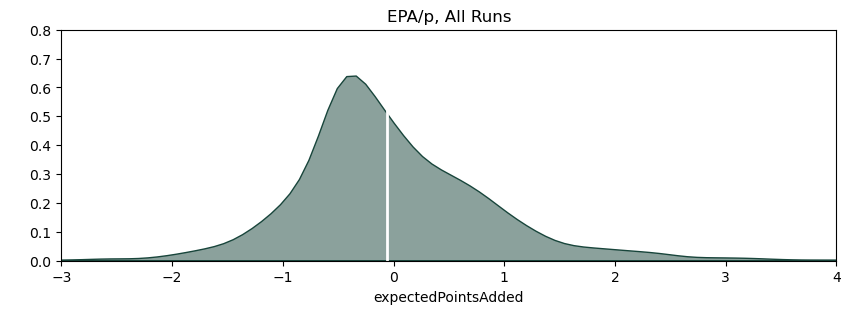

In [33]:
plt.figure(figsize=(10,3))
sns.kdeplot(plays, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.title('EPA/p, All Runs')
plt.ylabel(' ')
plt.axvline(plays['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8);
print(plays['expectedPointsAdded'].mean())

-0.053673106381371787


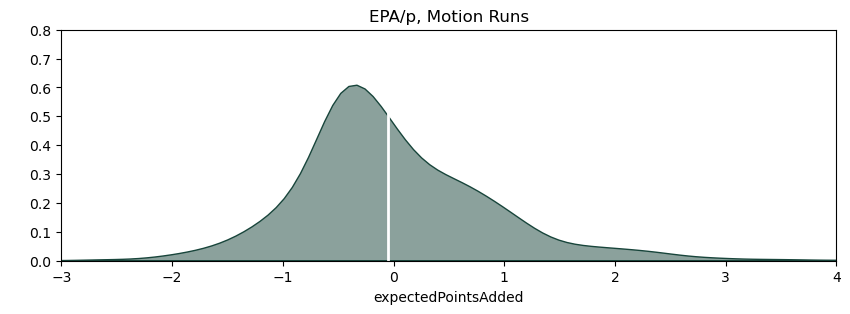

In [34]:
plt.figure(figsize=(10,3))
sns.kdeplot(motion_plays, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.title('EPA/p, Motion Runs')
plt.ylabel(' ')
plt.axvline(motion_plays['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8);
print(motion_plays['expectedPointsAdded'].mean())

-0.037351549757921376


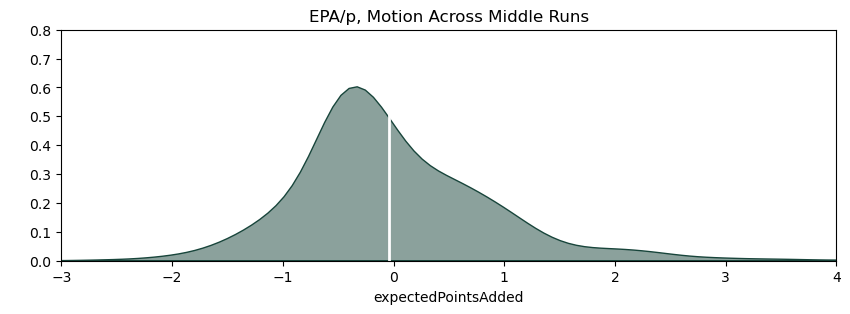

In [35]:
plt.figure(figsize=(10,3))
sns.kdeplot(plays_crossed_middle, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.title('EPA/p, Motion Across Middle Runs')
plt.ylabel(' ')
plt.axvline(plays_crossed_middle['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8);
print(plays_crossed_middle['expectedPointsAdded'].mean())

-0.11678451331032591


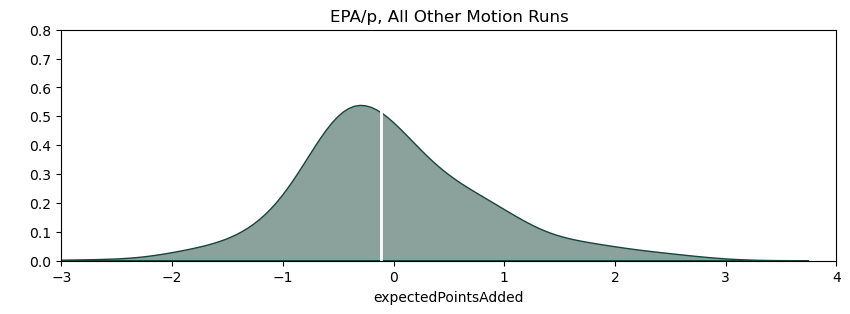

In [36]:
plt.figure(figsize=(10,3))
sns.kdeplot(plays_not_crossed_middle, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.title('EPA/p, All Other Motion Runs')
plt.ylabel(' ')
plt.axvline(plays_not_crossed_middle['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8);
print(plays_not_crossed_middle['expectedPointsAdded'].mean())

-0.013870124986947206


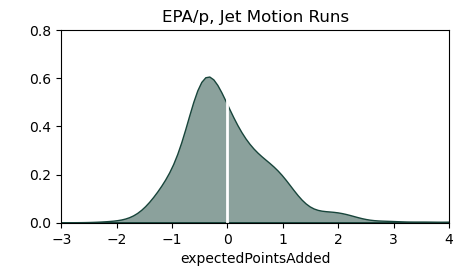

In [92]:
plt.figure(figsize=(5,2.5))
sns.kdeplot(jet_plays, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.title('EPA/p, Jet Motion Runs')
plt.ylabel(' ')
plt.axvline(jet_plays['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8);
print(jet_plays['expectedPointsAdded'].mean())

-0.0318858627205677


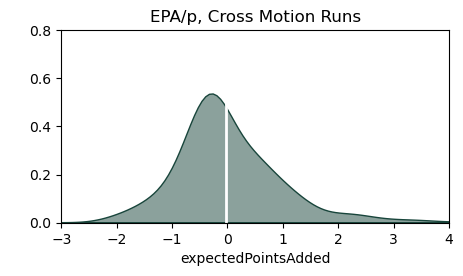

In [94]:
plt.figure(figsize=(5,2.5))
sns.kdeplot(yin_plays, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.title('EPA/p, Cross Motion Runs')
plt.ylabel(' ')
plt.axvline(yin_plays['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8);
print(yin_plays['expectedPointsAdded'].mean())

Absolute slope: 4.138285789753977e-06


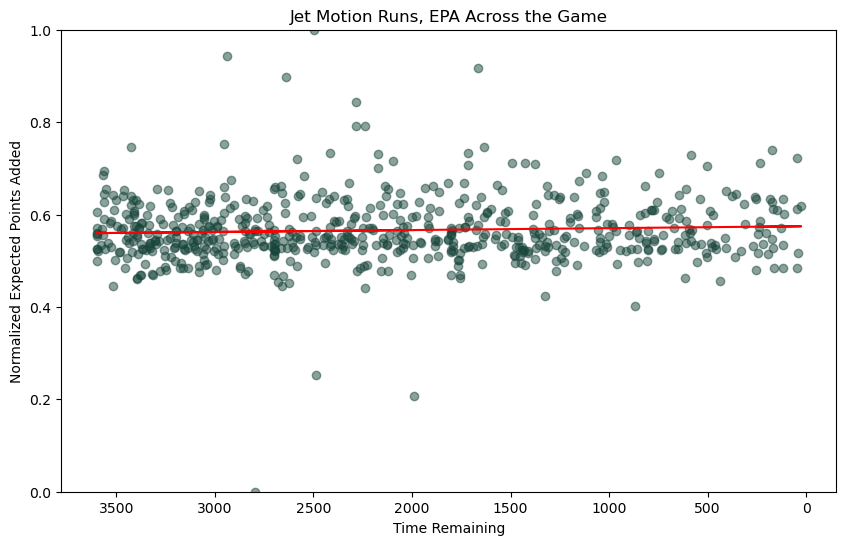

In [106]:
# Filter the dataset based on 'preSnapHomeTeamWinProbability'
jet_plays = jet_plays.filter((pl.col('preSnapHomeTeamWinProbability') > 0.1) & 
                              (pl.col('preSnapHomeTeamWinProbability') < 0.9))

# Assign the columns to variables
x = jet_plays['timeRemaining'].to_numpy()  # Convert to NumPy array
y = jet_plays['expectedPointsAdded'].to_numpy()  # Convert to NumPy array

# Min-max normalize y
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y))

# Perform linear regression using numpy's polyfit (1 degree = linear)
slope, intercept = np.polyfit(x, y_normalized, 1)

# Calculate the line for the fitted regression
line = slope * x + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y_normalized, color='#18453B', alpha=0.5)
plt.plot(x, line, color='red')

# Invert the x-axis
plt.gca().invert_xaxis()

# Set y-limits for normalized data
plt.ylim(0, 1)

# Add labels and title
plt.xlabel('Time Remaining')
plt.ylabel('Normalized Expected Points Added')
plt.title('Jet Motion Runs, EPA Across the Game')
# Display the absolute value of the slope
print(f"Absolute slope: {np.abs(slope)}")
# Display the plot
plt.show()



In [40]:
jet_man = jet_plays.filter((pl.col('pff_manZone') == 'Man'))
jet_zone = jet_plays.filter((pl.col('pff_manZone') == 'Zone'))
jet_zone

gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,uniquePlayId,minutes,seconds,gameClock_seconds,time_to_add,timeRemaining
i64,i64,str,i64,i64,i64,str,str,str,i64,str,i64,i64,str,i64,f64,f64,f64,str,str,str,str,str,str,str,bool,str,str,str,str,str,str,str,str,str,i64,str,str,str,i64,i64,f64,f64,f64,bool,str,str,i64,str,str,i64,i64,str,str,str,str,i64,i64,str,i64,i64,i64,i32,i64
2022103009,555,"""(5:17) J.Taylor up the middle …",1,1,10,"""IND""","""WAS""","""IND""",8,"""05:17""",0,0,"""N""",102,0.555503,0.444497,0.10626,"""SINGLEBACK""","""3x1""","""13""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""OUTSIDE_LEFT""","""NA""",3,3,-0.000832,0.000832,-0.278303,false,"""INSIDE ZONE""","""NA""",0,"""Cover-3""","""Zone""",2022,8,"""10/30/2022""","""16:25:00""","""IND""","""WAS""",16,17,"""2022103009-555""",5,17,317,2700,3017
2022091107,254,"""(12:41) (Shotgun) L.Jackson ri…",1,3,2,"""BAL""","""NYJ""","""BAL""",36,"""12:41""",0,0,"""N""",46,0.386784,0.613216,1.268178,"""EMPTY""","""3x2""","""8""","""""","""NA""","""NA""","""NA""",true,"""DESIGNED_RUN""","""6.13000011444092""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""INSIDE_RIGHT""","""NA""",4,4,-0.022063,0.022063,1.116216,false,"""COUNTER""","""INVERTED;READ OPTION""",0,"""Quarters""","""Zone""",2022,1,"""9/11/2022""","""13:00:00""","""NYJ""","""BAL""",9,24,"""2022091107-254""",12,41,761,2700,3461
2022092900,2469,"""(7:21) J.Mixon left end to MIA…",3,1,10,"""CIN""","""MIA""","""MIA""",49,"""07:21""",14,12,"""N""",61,0.716145,0.283855,3.10659,"""SINGLEBACK""","""3x1""","""9""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""INSIDE_LEFT""","""NA""",4,4,-0.007345,0.007345,-0.197327,false,"""PULL LEAD""","""PITCH""",0,"""Cover-3""","""Zone""",2022,4,"""9/29/2022""","""20:15:00""","""CIN""","""MIA""",27,15,"""2022092900-2469""",7,21,441,900,1341
2022092504,3192,"""(12:53) D.Swift left tackle to…",4,1,10,"""DET""","""MIN""","""DET""",9,"""12:53""",14,24,"""N""",101,0.153612,0.846388,0.367209,"""SINGLEBACK""","""2x2""","""16""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""INSIDE_LEFT""","""NA""",4,4,-0.008448,0.008448,-0.246641,false,"""OUTSIDE ZONE""","""SPLIT""",0,"""Quarters""","""Zone""",2022,3,"""9/25/2022""","""13:00:00""","""MIN""","""DET""",28,24,"""2022092504-3192""",12,53,773,0,773
2022103005,999,"""(14:54) D.Cook right end to MI…",2,1,10,"""MIN""","""ARI""","""MIN""",17,"""14:54""",7,3,"""N""",93,0.824988,0.175012,1.036467,"""SINGLEBACK""","""2x2""","""11""","""""","""NA""","""NA""","""NA""",false,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",0,"""FALSE""","""OUTSIDE_RIGHT""","""NA""",19,19,0.018128,-0.018128,1.190845,false,"""MAN""","""MISDIRECTION""",0,"""Cover-3""","""Zone""",2022,8,"""10/30/2022""","""13:00:00""","""MIN""","""ARI""",34,26,"""2022103005-999""",14,54,894,1800,2694
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

0.06355943148980465
-0.051388303468548134


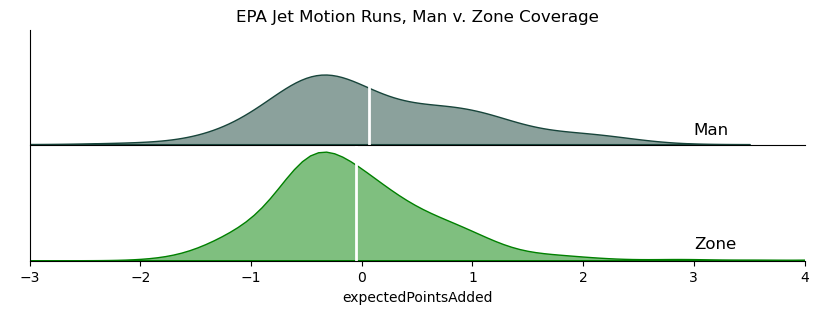

In [100]:
plt.figure(figsize=(10,3))
plt.subplot(2,1,1)
sns.kdeplot(jet_man, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.ylabel(' ')
plt.xlabel(' ')
plt.axvline(jet_man['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,    
    left=False,
    labelleft=False)
sns.despine(top=True, right=True)
plt.text(3, 0.05, 'Man', fontsize=12, ha='left', va='bottom', color='black')
plt.title('EPA Jet Motion Runs, Man v. Zone Coverage')
print(jet_man['expectedPointsAdded'].mean())

plt.subplot(2,1,2)
sns.kdeplot(jet_zone, x='expectedPointsAdded', fill=True, color='green', alpha=0.5)
plt.ylabel(' ')
plt.axvline(jet_zone['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.65)
plt.tick_params(
    axis='y',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,    
    left=False,
    labelleft=False)
sns.despine(top=True, right=True)
plt.text(3, 0.05, 'Zone', fontsize=12, ha='left', va='bottom', color='black')
plt.gca().patch.set_alpha(0)
print(jet_zone['expectedPointsAdded'].mean())

plt.subplots_adjust(hspace=0.01);

In [42]:
all_man = plays.filter((pl.col('pff_manZone') == 'Man'))
all_zone = plays.filter((pl.col('pff_manZone') == 'Zone'))

0.006632193899750712
-0.09028958949144186


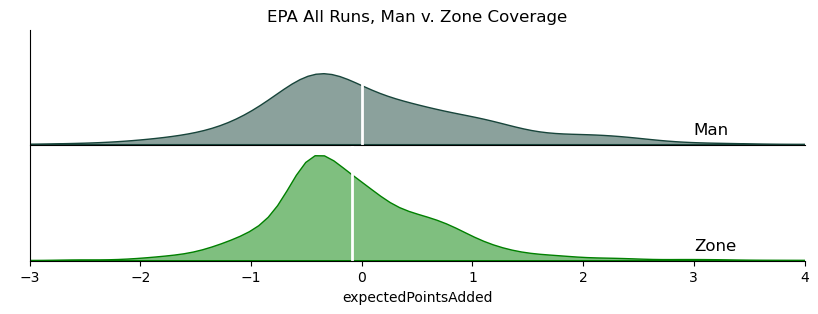

In [102]:
plt.figure(figsize=(10,3))
plt.subplot(2,1,1)
sns.kdeplot(all_man, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.ylabel(' ')
plt.xlabel(' ')
plt.axvline(all_man['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,    
    left=False,
    labelleft=False)
sns.despine(top=True, right=True)
plt.text(3, 0.05, 'Man', fontsize=12, ha='left', va='bottom', color='black')
plt.title('EPA All Runs, Man v. Zone Coverage')
print(all_man['expectedPointsAdded'].mean())

plt.subplot(2,1,2)
sns.kdeplot(all_zone, x='expectedPointsAdded', fill=True, color='green', alpha=0.5)
plt.ylabel(' ')
plt.axvline(all_zone['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.75)
plt.tick_params(
    axis='y',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,    
    left=False,
    labelleft=False)
sns.despine(top=True, right=True)
plt.text(3, 0.05, 'Zone', fontsize=12, ha='left', va='bottom', color='black')
plt.gca().patch.set_alpha(0)
print(all_zone['expectedPointsAdded'].mean())

plt.subplots_adjust(hspace=0.01);

In [96]:
yin_man = yin_plays.filter((pl.col('pff_manZone') == 'Man'))
yin_zone = yin_plays.filter((pl.col('pff_manZone') == 'Zone'))

0.006632193899750712
-0.07938074879625463


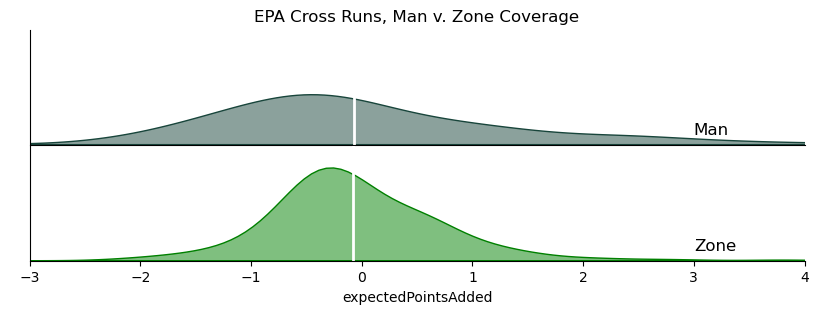

In [104]:
plt.figure(figsize=(10,3))
plt.subplot(2,1,1)
sns.kdeplot(yin_man, x='expectedPointsAdded', fill=True, color='#18453B', alpha=0.5)
plt.ylabel(' ')
plt.xlabel(' ')
plt.axvline(yin_man['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.8)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,    
    left=False,
    labelleft=False)
sns.despine(top=True, right=True)
plt.text(3, 0.05, 'Man', fontsize=12, ha='left', va='bottom', color='black')
plt.title('EPA Cross Runs, Man v. Zone Coverage')
print(all_man['expectedPointsAdded'].mean())

plt.subplot(2,1,2)
sns.kdeplot(yin_zone, x='expectedPointsAdded', fill=True, color='green', alpha=0.5)
plt.ylabel(' ')
plt.axvline(yin_zone['expectedPointsAdded'].mean(), color='white', linestyle='-', linewidth=2)
plt.xlim(-3, 4)
plt.ylim(0,0.75)
plt.tick_params(
    axis='y',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,    
    left=False,
    labelleft=False)
sns.despine(top=True, right=True)
plt.text(3, 0.05, 'Zone', fontsize=12, ha='left', va='bottom', color='black')
plt.gca().patch.set_alpha(0)
print(yin_zone['expectedPointsAdded'].mean())

plt.subplots_adjust(hspace=0.01);